In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

os.listdir("/content/drive/MyDrive/archive")

['fashion-mnist_test.csv',
 'fashion-mnist_train.csv',
 'train-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 't10k-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/archive/fashion-mnist_train.csv")
test=pd.read_csv("/content/drive/MyDrive/archive/fashion-mnist_test.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



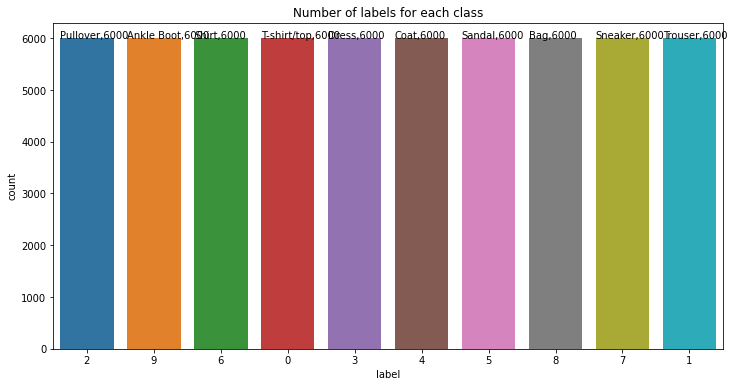

In [ ]:
import seaborn as sns
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate('{},{:.0f}'.format(labels[label],p.get_height()), (p.get_x(), p.get_height()+0.15))
        
    plt.show()  
    
plot_label_per_class(train)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



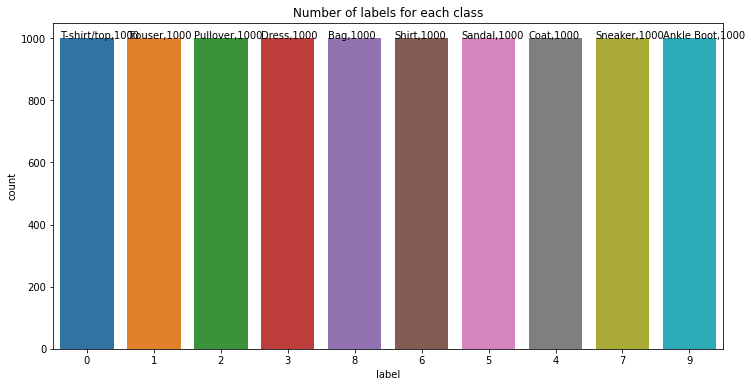

In [ ]:
plot_label_per_class(test)

In [ ]:
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [ ]:
x_train =train_data[:, 1:]/255
y_train =train_data[:, 0]

x_test =test_data[:, 1:]/255
y_test =test_data[:, 0]


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state= 1234)


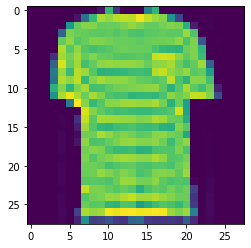

In [ ]:
image= x_train[50, :].reshape((28, 28))
plt.imshow(image)
plt.show()

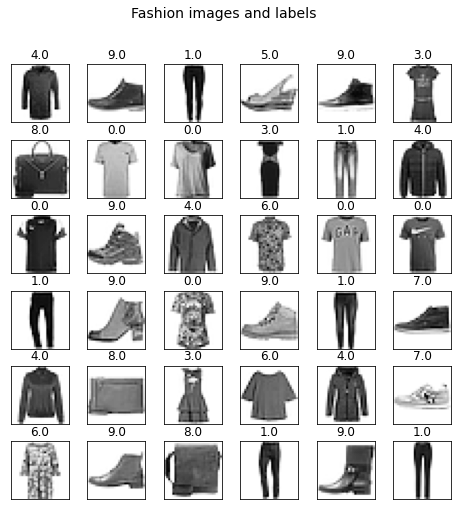

In [ ]:
import random
fig, ax = plt.subplots(6, 6, figsize=(8,8))
fig.suptitle('Fashion images and labels', fontsize= 14)
ax=ax.ravel()
for i in range(36):
    sample_n= random.randint(0, x_train.shape[0])
    ax[i].imshow((x_train[sample_n]).reshape(28,28), cmap='Greys')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(y_train[sample_n], fontsize=12)
    
plt.subplots_adjust(hspace=0.3)

In [ ]:
im_rows =28
im_cols = 28
batch_size =512
im_shape =(im_rows, im_cols,1)

x_train1 = x_train.reshape(x_train.shape[0],*im_shape)
x_test1 = x_test.reshape(x_test.shape[0],*im_shape)
x_val1 = x_val.reshape(x_val.shape[0],*im_shape)


In [ ]:
print('x_train shape: {}'.format(x_train1.shape))
print('x_test shape: {}'.format(x_test1.shape))
print('x_val shape: {}'.format(x_val1.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_val shape: (12000, 28, 28, 1)


In [ ]:
cnn_model = Sequential([
    Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 128)       0         
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 128)               2769024   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

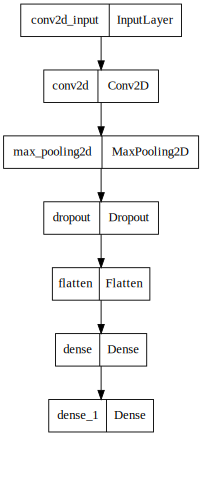

In [ ]:
plot_model(cnn_model, to_file='model.png')
SVG(model_to_dot(cnn_model,dpi=65).create(prog='dot', format='svg'))


In [ ]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
history2 = cnn_model.fit(
    x_train1, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_val1, y_val))

Epoch 1/10
94/94 [==============================] - 14s 28ms/step - loss: 0.5607 - accuracy: 0.8054 - val_loss: 0.3804 - val_accuracy: 0.8663
Epoch 2/10
94/94 [==============================] - 2s 25ms/step - loss: 0.3426 - accuracy: 0.8808 - val_loss: 0.3146 - val_accuracy: 0.8882
Epoch 3/10
94/94 [==============================] - 2s 26ms/step - loss: 0.2963 - accuracy: 0.8957 - val_loss: 0.2975 - val_accuracy: 0.8932
Epoch 4/10
94/94 [==============================] - 3s 31ms/step - loss: 0.2662 - accuracy: 0.9054 - val_loss: 0.2969 - val_accuracy: 0.8945
Epoch 5/10
94/94 [==============================] - 3s 28ms/step - loss: 0.2476 - accuracy: 0.9107 - val_loss: 0.2705 - val_accuracy: 0.9018
Epoch 6/10
94/94 [==============================] - 2s 25ms/step - loss: 0.2270 - accuracy: 0.9191 - val_loss: 0.2545 - val_accuracy: 0.9103
Epoch 7/10
94/94 [==============================] - 2s 26ms/step - loss: 0.2097 - accuracy: 0.9241 - val_loss: 0.2521 - val_accuracy: 0.9073
Epoch 8/10
9

In [ ]:


def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(history2)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
score= cnn_model.evaluate(x_test1,y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print('test accuracy: {:.4f}'.format(score[1]))

test loss: 0.2283
test accuracy: 0.9193


In [ ]:
p = cnn_model.predict(x_test1)
pred = np.argmax(p, axis=1)

target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]
print(classification_report(y_test, pred, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.89      0.83      0.86      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.84      0.91      0.87      1000
      Class 3 (Dress) :       0.93      0.93      0.93      1000
       Class 4 (Coat) :       0.91      0.84      0.87      1000
     Class 5 (Sandal) :       0.99      0.98      0.98      1000
      Class 6 (Shirt) :       0.75      0.80      0.77      1000
    Class 7 (Sneaker) :       0.96      0.97      0.96      1000
        Class 8 (Bag) :       0.98      0.98      0.98      1000
 Class 9 (Ankle Boot) :       0.97      0.97      0.97      1000

               accuracy                           0.92     10000
              macro avg       0.92      0.92      0.92     10000
           weighted avg       0.92      0.92      0.92     10000



RNN

In [ ]:
im_shape=(im_rows,im_cols)
x_train2= x_train.reshape(len(x_train),*im_shape)
x_test2=x_test.reshape(len(x_test),*im_shape)
x_val2= x_val.reshape(len(x_val), *im_shape)

In [ ]:
rnn_model=Sequential()

rnn_model.add(LSTM(128, input_shape=(x_train2.shape[1:]), activation='relu', return_sequences= True))
rnn_model.add(Dropout(0.2))
rnn_model.add(LSTM(128, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(10, activation='softmax'))

opt=tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
rnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout_1 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)               

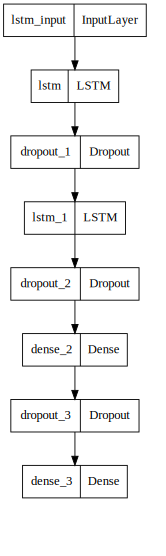

In [ ]:
plot_model(rnn_model, to_file='model.png')
SVG(model_to_dot(rnn_model,dpi=65).create(prog='dot', format='svg'))

In [ ]:
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history = rnn_model.fit(x_train2, y_train, epochs=10, validation_data=(x_val2, y_val))

Epoch 1/10
1500/1500 [==============================] - 79s 52ms/step - loss: 0.9083 - accuracy: 0.6820 - val_loss: 0.5433 - val_accuracy: 0.7970
Epoch 2/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.5467 - accuracy: 0.8050 - val_loss: 0.4528 - val_accuracy: 0.8305
Epoch 3/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.4631 - accuracy: 0.8366 - val_loss: 0.3966 - val_accuracy: 0.8522
Epoch 4/10
1500/1500 [==============================] - 73s 49ms/step - loss: 0.4228 - accuracy: 0.8499 - val_loss: 0.3977 - val_accuracy: 0.8586
Epoch 5/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.3958 - accuracy: 0.8605 - val_loss: 0.3491 - val_accuracy: 0.8693
Epoch 6/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.3998 - accuracy: 0.8637 - val_loss: 0.3584 - val_accuracy: 0.8662
Epoch 7/10
1500/1500 [==============================] - 75s 50ms/step - loss: 0.3605 - accuracy: 0.8704 - val_loss: 0.3451 -

In [ ]:
plot_accuracy_and_loss(history)


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
score= rnn_model.evaluate(x_test2,y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print('test accuracy: {:.4f}'.format(score[1]))

test loss: 0.2908
test accuracy: 0.8902


TypeError: ignored

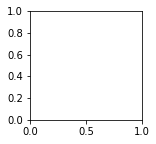

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


p = cnn_model.predict(x_test1)
pred = np.argmax(p, axis=1)
fig.suptitle('Fashion images and labels', fontsize= 14)

for i in range(10):
    plt.figure(figsize = (2,2))
    plt.imshow(x_test1[i], cmap="binary",  aspect='auto')
    plt.title('Original: {}, Predicted: {}'.format(classes[int(y_test[i])], classes[pred[i]]))
    plt.axis("Off")
    plt.figure()